# 5.3.1 Frictional Plasticity and Non-Associated Flow - A Two-dimensional model

This example gives the numerical implementation of the two dimensional frictional plasticity model with non-associated flow.

The Helmholtz free energy $f$ and the yield function $y$ for this model are given by:

\begin{align*}
f = & - \frac{K}{2} (\epsilon - \alpha_{\epsilon})^2 - \frac{G}{2} (\gamma - \alpha_{\gamma})^2 \\
y = & \left| \chi_{\tau} \right|  + \mu \sigma + \beta \chi_{\sigma}
\end{align*}

The incremental response for this model can be written as follows:

\begin{align*}
\dot{\sigma} = & \frac{\partial^2 f}{\partial \epsilon^2} \dot{\epsilon} + \frac{\partial^2 f}{\partial \epsilon \partial \alpha_{\epsilon}} \dot{\alpha}_{\epsilon} \\
\dot{\tau} = & \frac{\partial^2 f}{\partial \gamma^2} \dot{\gamma} + \frac{\partial^2 f}{\partial \gamma \partial \alpha_{\gamma}} \dot{\alpha}_{\gamma} \\
-\dot{\bar{\chi}}_{\sigma} = & \frac{\partial^2 f}{\partial \alpha_{\epsilon} \partial \epsilon} \dot{\epsilon} + \frac{\partial^2 f}{\partial \alpha_{\epsilon}^2} \dot{\alpha}_{\epsilon} \\ 
-\dot{\bar{\chi}}_{\tau} = & \frac{\partial^2 f}{\partial \alpha_{\gamma} \partial \gamma} \dot{\gamma} + \frac{\partial^2 f}{\partial \alpha_{\gamma}^2} \dot{\alpha}_{\gamma}
\end{align*}

The rate of hardening strain is defined by:

\begin{align*}
\dot{\alpha}_{\epsilon} =  & \lambda \frac{\partial y}{\partial \chi_{\sigma}} \\
\dot{\alpha}_{\gamma}   =  & \lambda \frac{\partial y}{\partial \chi_{\tau}} \\
\end{align*}

where the multiplyer $\lambda_n$ is derived from the consistency condition:
\begin{equation*}
\dot{y} = 0 = \frac{\partial y}{\partial \sigma} \dot{\sigma} + \frac{\partial y}{\partial \chi_{\sigma}} \dot{\chi_{\sigma}} + \frac{\partial y}{\partial \chi_{\tau}} \dot{\chi_{\tau}}
\end{equation*}

Combining the above equations for the one dimensional model with Ziegler's orthogonality condition ($\chi=\bar{\chi}$) gives:
\begin{align*}
0 = & \frac{\partial y}{\partial \sigma} \left( \frac{\partial^2 f}{\partial \epsilon^2} \dot{\epsilon} + \frac{\partial^2 f}{\partial \epsilon \partial \alpha_{\epsilon}} \lambda \frac{\partial y}{\partial \chi_{\sigma}} \right) - \frac{\partial y}{\partial \chi_{\sigma}} \left( \frac{\partial^2 f}{\partial \alpha_{\epsilon} \partial \epsilon} \dot{\epsilon} + \frac{\partial^2 f}{\partial \alpha_{\epsilon}^2} \lambda \frac{\partial y}{\partial \chi_{\sigma}} \right) - \frac{\partial y}{\partial \chi_{\tau}} \left( \frac{\partial^2 f}{\partial \alpha_{\gamma} \partial \gamma} \dot{\gamma} + \frac{\partial^2 f}{\partial \alpha_{\gamma}^2} \lambda \frac{\partial y}{\partial \chi_{\tau}} \right) \\
\end{align*}

\begin{align*}
\lambda = & - \frac{\left(\frac{\partial y}{\partial \sigma} \frac{\partial^2 f}{\partial \epsilon^2} - \frac{\partial y}{\partial \chi_{\sigma}} \frac{\partial^2 f}{\partial \alpha_{\epsilon} \partial \epsilon} \right) \dot{\epsilon} - \left( \frac{\partial y}{\partial \chi_{\tau}} \frac{\partial^2 f}{\partial \alpha_{\gamma} \partial \gamma} \right) \dot{\gamma} }{ \left( \frac{\partial y}{\partial \sigma} \frac{\partial^2 f}{\partial \epsilon \partial \alpha_{\epsilon}} - \frac{\partial y}{\partial \chi_{\sigma}} \frac{\partial^2 f}{\partial \alpha_{\epsilon}^2} \right) \frac{\partial y}{\partial \chi_{\sigma}} - \left( \frac{\partial y}{\partial \chi_{\tau}} \frac{\partial^2 f}{\partial \alpha_{\gamma}^2} \right) \frac{\partial y}{\partial \chi_{\tau}} }
\end{align*}

In [1]:
# The implementation of the above equations is given below
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Model parameters
K = 10
G = 10

mu = 0.3
beta = 0.1

# Initialise the model state parameters
sigma =-2
tau = 0
chi_s = sigma
chi_t = 0
alpha_e = 0
alpha_g = 0

# Define the applied stress history
gamma_max_abs_1 = 3
gamma_max_abs_2 = 0
d_gamma_abs = 0.001

gamma_history = np.append(np.arange(0, gamma_max_abs_1, d_gamma_abs), 
                np.arange(gamma_max_abs_1, -gamma_max_abs_2, -d_gamma_abs))
epsilon_history = 0 * gamma_history

indices = np.arange(0,len(epsilon_history))

sigma_history = np.zeros_like(epsilon_history)
tau_history = np.zeros_like(gamma_history)

d2_f_d_e2 = -K
d2_f_d_eae = K
d2_f_d_aee = K
d2_f_d_ae2 =-K
d2_f_d_g2 = -G
d2_f_d_gag = G
d2_f_d_agg = G
d2_f_d_ag2 =-G

epsilon_0 = 0
gamma_0   = 0

# Calculate the incremental response
for index, epsilon, gamma in zip(indices, epsilon_history, gamma_history):
    
    d_epsilon = epsilon - epsilon_0
    d_gamma = gamma - gamma_0
            
    y = np.abs(chi_t) + mu * sigma + beta * chi_s
    
    d_y_d_chi_s = beta
    d_y_d_chi_t = np.sign(chi_t)
    d_y_d_sigma = mu
    
    if y > 0 and (d_gamma * d_y_d_chi_t + d_epsilon * d_y_d_chi_s) < 0:
        _lambda = -((d_y_d_sigma * d2_f_d_e2 - d_y_d_chi_s * d2_f_d_aee) * d_epsilon - (d_y_d_chi_t * d2_f_d_agg) * d_gamma)/((d_y_d_sigma * d2_f_d_eae - d_y_d_chi_s * d2_f_d_ae2) * d_y_d_chi_s - d_y_d_chi_t * d2_f_d_ag2 * d_y_d_chi_t) 
    else:
        _lambda = 0
                
    d_alpha_e = _lambda * d_y_d_chi_s
    d_alpha_g = _lambda * d_y_d_chi_t
        
    d_sigma = (d2_f_d_e2 * d_epsilon + d2_f_d_eae * d_alpha_e )
    d_tau = (d2_f_d_g2 * d_gamma + d2_f_d_gag * d_alpha_g )
    
    d_chi_s = - (d2_f_d_aee * d_epsilon + d2_f_d_ae2 * d_alpha_e)
    d_chi_t = - (d2_f_d_agg * d_gamma + d2_f_d_ag2 * d_alpha_g)
        
    sigma = sigma + d_sigma
    tau = tau + d_tau
    chi_s = chi_s + d_chi_s
    chi_t = chi_t + d_chi_t
    alpha_e = alpha_e + d_alpha_e
    alpha_g = alpha_g + d_alpha_g
    
    epsilon_0 = epsilon
    gamma_0 = gamma
            
    sigma_history[index] = sigma
    tau_history[index] = tau

Text(0,0.5,'$\\tau$')

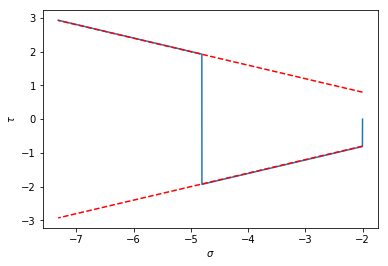

In [2]:
plt.plot(sigma_history, tau_history)
plt.plot(sigma_history, (mu+beta)*sigma_history , 'r--')
plt.plot(sigma_history,-(mu+beta)*sigma_history , 'r--')
plt.xlabel('$\\sigma$')
plt.ylabel('$\\tau$')